## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")


## Importing Dataset

In [2]:
df = pd.read_excel(r'C:\Users\BOT-PC\Text Summarization Capstone Project\projectdatanew.xlsx')

## Exploratory Data Analysis

In [3]:
df.head()

,Name,new_objective_extracted,new_strategy_extracted,ticker,prospectus_link,Target Variable
0,iShares msci germany etf,The iShares MSCI Germany ETF (the “Fund”) see...,The Fund seeks to track the investment results...,EWG,https://www.sec.gov/Archives/edgar/data/930667...,Medium Risk
1,iShares msci mexico etf,The iShares MSCI Mexico ETF (the “Fund”) seek...,The Fund seeks to track the investment results...,EWW,https://www.sec.gov/Archives/edgar/data/930667...,High Risk
2,Fidelity® Cash Central Fund,Fidelity® Cash Central Fund seeks to obtain a ...,The Adviser invests the fund's assets in U.S. ...,NaN,https://www.sec.gov/Archives/edgar/data/102269...,Low Risk
3,iShares msci malaysia etf,The iShares MSCI Malaysia ETF (the “Fund”) se...,The Fund seeks to track the investment resul...,EWM,https://www.sec.gov/Archives/edgar/data/930667...,High Risk
4,iShares msci malaysia etf,The iShares MSCI Malaysia ETF (the “Fund”) se...,The Fund seeks to track the investment results...,EWM,https://www.sec.gov/Archives/edgar/data/930667...,High Risk


In [4]:
df['new_strategy_extracted'][0]

"The Fund seeks to track the investment results of the MSCI Germany Index (the “Underlying Index”), which consists of stocks traded primarily on the Frankfurt Stock Exchange. The Underlying Index may include large-, mid- or small-capitalization companies. Components of the Underlying Index primarily include consumer discretionary, financials and healthcare companies. The components of the Underlying Index, and the degree to which these components represent certain industries, are likely to change over time.\nBFA uses a “passive” or indexing approach to try to achieve the Fund’s investment objective. Unlike many investment companies, the Fund does not try to “beat” the index it tracks and does not seek temporary defensive positions when markets decline or appear overvalued.\nIndexing may eliminate the chance that the Fund will substantially outperform the Underlying Index but also may reduce some of the risks of active management, such as poor security selection. Indexing seeks to achie

In [5]:
df = df[pd.notnull(df['new_strategy_extracted'])]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 223
Data columns (total 6 columns):
Name                       224 non-null object
new_objective_extracted    224 non-null object
new_strategy_extracted     224 non-null object
ticker                     211 non-null object
prospectus_link            224 non-null object
Target Variable            224 non-null object
dtypes: object(6)
memory usage: 12.2+ KB


## Selecting Meaningful Features

In [7]:
col = ['Target Variable', 'new_strategy_extracted']
df = df[col]

In [8]:
df.columns

Index(['Target Variable', 'new_strategy_extracted'], dtype='object')

In [9]:
df.columns = ['target_variable', 'new_strategy_extracted']

In [10]:
df.head()

,target_variable,new_strategy_extracted
0,Medium Risk,The Fund seeks to track the investment results...
1,High Risk,The Fund seeks to track the investment results...
2,Low Risk,The Adviser invests the fund's assets in U.S. ...
3,High Risk,The Fund seeks to track the investment resul...
4,High Risk,The Fund seeks to track the investment results...


In [11]:
df['category_id'] = df['target_variable'].factorize()[0]
from io import StringIO
category_id_df = df[['target_variable', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'target_variable']].values)

In [12]:
df.head()

,target_variable,new_strategy_extracted,category_id
0,Medium Risk,The Fund seeks to track the investment results...,0
1,High Risk,The Fund seeks to track the investment results...,1
2,Low Risk,The Adviser invests the fund's assets in U.S. ...,2
3,High Risk,The Fund seeks to track the investment resul...,1
4,High Risk,The Fund seeks to track the investment results...,1



# Frequency Count of Target Variable

In [13]:
from collections import Counter
Counter(df["target_variable"])

Counter({'Medium Risk': 159, 'High Risk': 44, 'Low Risk': 21})

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('target_variable').new_strategy_extracted.count().plot.bar(ylim=0)

# Data Cleaning

In [15]:
import re 
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    
    """
    string = re.sub(r"\n", "", string)    
    string = re.sub(r"\r", "", string) 
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()
X = []
for i in range(df.shape[0]):
    X.append(clean_str(df.iloc[i][1]))
y = np.array(df["category_id"])

In [16]:
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

# Tokenization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(X).toarray()
labels = df.category_id
features.shape

(224, 2190)

In [18]:
df.head()

,target_variable,new_strategy_extracted,category_id
0,Medium Risk,The Fund seeks to track the investment results...,0
1,High Risk,The Fund seeks to track the investment results...,1
2,Low Risk,The Adviser invests the fund's assets in U.S. ...,2
3,High Risk,The Fund seeks to track the investment resul...,1
4,High Risk,The Fund seeks to track the investment results...,1


# Data Modeling

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, df['target_variable'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [20]:
print(X_train_counts.shape)

(168, 1754)


In [21]:
print(clf.predict(count_vect.transform(['''
The Fund seeks to track the investment results of the MSCI Emerging Markets ex China Index (the “Underlying Index”), which is designed to measure equity market performance in global emerging markets (with the exception of China). The Underlying Index is a free float-adjusted market capitalization weighted index that captures large- and mid-capitalization stocks across 23 of the 24 Emerging Markets countries (as defined by MSCI Inc. (the “Index Provider” or “MSCI”)), excluding China. The Underlying Index covers approximately 85% of the free float-adjusted market capitalization of each
of the following countries: Brazil, Chile, Colombia, Czechia, Egypt, Greece, Hungary, India, Indonesia, Malaysia, Mexico, Pakistan, Peru, the Philippines, Poland, Qatar, Russia, South Africa, South Korea, Taiwan, Thailand, Turkey and the United Arab Emirates. As of August 31, 2018, a significant portion of the Underlying Index is represented by securities of companies in the financials and information technology industries or sectors. The components of the Underlying Index are likely to change over time.
Currently, the Fund achieves its investment objective by investing all or a portion of its assets that are invested in India through one or more iShares exchange-traded funds (each an “ETF” or an “Underlying Fund”). However, BFA is not required to invest any portion, or any particular percentage, of the Fund’s assets in an Underlying Fund.
BFA uses a “passive” or indexing approach to try to achieve the Fund’s investment objective. Unlike many investment companies, the Fund does not try to “beat” the index it tracks and does not seek temporary defensive positions when markets decline or appear overvalued.
Indexing may eliminate the chance that the Fund will substantially outperform the Underlying Index but also may reduce some of the risks of active management, such as poor security selection. Indexing seeks to achieve lower costs and better after-tax performance by keeping portfolio turnover low in comparison to actively managed investment companies.
BFA uses a representative sampling indexing strategy to manage the Fund. “Representative sampling” is an indexing strategy that involves investing in a representative sample of securities that collectively has an investment profile similar to that of an applicable underlying index. The securities selected are expected to have, in the aggregate, investment characteristics (based on factors such as market capitalization and industry weightings), fundamental characteristics (such as return variability and yield) and liquidity measures similar to those of an applicable underlying index. The Fund may or may not hold all of the securities in the Underlying Index.
The Fund generally will invest at least 90% of its assets in the component securities (including indirect investments through an Underlying Fund) of the Underlying Index and may invest up to 10% of its assets in certain futures, options and swap contracts, cash and cash equivalents, including shares of money market funds advised by BFA or its affiliates, as well as in securities not included in the Underlying Index, but which BFA believes will help the Fund track the Underlying Index.
The Underlying Fund holds Indian securities through a wholly-owned subsidiary located in the Republic of Mauritius (the “Subsidiary”). BFA serves as investment adviser to the Fund, each Underlying Fund and the Subsidiary. Unless otherwise indicated, the term “Fund” as used in this Prospectus
means the Fund, Underlying Fund and/or the Subsidiary, as applicable. The Fund seeks to track the investment results of the Underlying Index before fees and expenses of the Fund.
The Fund may lend securities representing up to one-third of the value of the Fund's total assets (including the value of any collateral received).
The Underlying Index is sponsored by MSCI, which is independent of the Fund and BFA. The Index Provider determines the composition and relative weightings of the securities in the Underlying Index and publishes information regarding the market value of the Underlying Index"
'''])))

['Medium Risk']


In [22]:
df[df['new_strategy_extracted'] == '''The Adviser normally invests at least 80% of the fund's assets in convertible securities. Convertible securities are often lower-quality debt securities (those of less than investment-grade quality, also referred to as high yield debt securities or junk bonds). The Adviser may also invest the fund's assets in other types of securities, including common stocks.

The Adviser may invest the fund's assets in securities of foreign issuers in addition to securities of domestic issuers.

In buying and selling securities for the fund, the Adviser relies on fundamental analysis, which involves a bottom-up assessment of a company's potential for success in light of factors including its financial condition, earnings outlook, strategy, management, industry position, and economic and market conditions.

In addition to the principal investment strategies discussed above, the Adviser may lend the fund's securities to broker-dealers or other institutions to earn income for the fund.

The Adviser may also use various techniques, such as buying and selling futures contracts and exchange traded funds, to increase or decrease the fund's exposure to changing security prices or other factors that affect security values.

If the Adviser's strategies do not work as intended, the fund may not achieve its objective.''']

,target_variable,new_strategy_extracted,category_id
93,High Risk,The Adviser normally invests at least 80% of t...,1
94,High Risk,The Adviser normally invests at least 80% of t...,1


In [23]:
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    MLPClassifier(alpha=0.7, max_iter=600)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [24]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.717391
1,RandomForestClassifier,1,0.666667
2,RandomForestClassifier,2,0.733333
3,RandomForestClassifier,3,0.666667
4,RandomForestClassifier,4,0.744186
5,LinearSVC,0,0.739130
6,LinearSVC,1,0.644444
7,LinearSVC,2,0.822222
8,LinearSVC,3,0.755556
9,LinearSVC,4,0.906977


In [25]:
df1 = cv_df.groupby('model_name').accuracy.mean()
df2 = df1.to_frame().reset_index()
df2

,model_name,accuracy
0,LinearSVC,0.773666
1,LogisticRegression,0.723330
2,MLPClassifier,0.786999
3,MultinomialNB,0.697380
4,RandomForestClassifier,0.705649


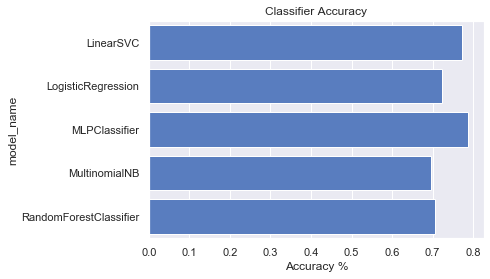

In [26]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_color_codes("muted")
sns.barplot(x='accuracy', y='model_name', data=df2, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()


In [27]:
from sklearn.model_selection import train_test_split

model = MLPClassifier(alpha=0.7, max_iter=600)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

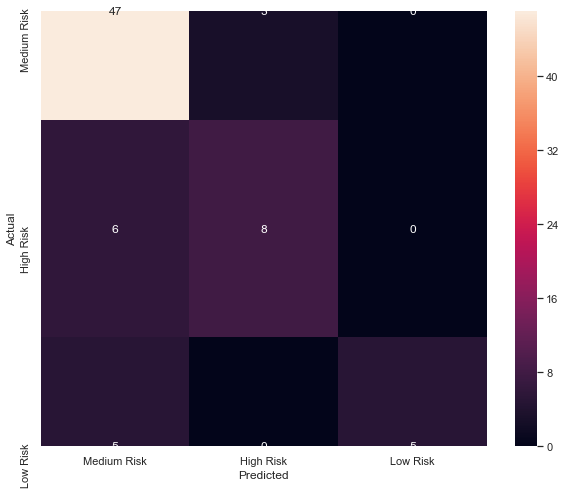

In [34]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.target_variable.values, yticklabels=category_id_df.target_variable.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
conf_mat

array([[47,  3,  0],
       [ 6,  8,  0],
       [ 5,  0,  5]], dtype=int64)

In [30]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['target_variable', 'new_strategy_extracted']])
      print('')

'High Risk' predicted as 'Medium Risk' : 6 examples.


,target_variable,new_strategy_extracted
169,High Risk,The Fund seeks to track the investment results...
44,High Risk,The Fund seeks to track the investment results...
201,High Risk,The Fund seeks to track the investment results...
196,High Risk,The Fund seeks to track the investment results...
205,High Risk,The Fund seeks to track the investment results...
26,High Risk,The Fund seeks to track the investment results...


In [31]:
model.fit(features, labels)

MLPClassifier(activation='relu', alpha=0.7, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=600, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

# Classification Report

In [32]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['target_variable'].unique()))

              precision    recall  f1-score   support

 Medium Risk       0.81      0.94      0.87        50
   High Risk       0.73      0.57      0.64        14
    Low Risk       1.00      0.50      0.67        10

    accuracy                           0.81        74
   macro avg       0.85      0.67      0.73        74
weighted avg       0.82      0.81      0.80        74



In [33]:
cv_accuracy = cross_val_score(model, features, labels,cv=5)
print("Mean Accuracy: {}".format(np.mean(cv_accuracy)))

Mean Accuracy: 0.7869992135715088


### MLP Classifier is the best model for the given dataset with highest accuracy of 78%